In [29]:
import pandas as pd
import numpy as npC
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume($)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:10]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv
2020-06-06.csv
2020-06-07.csv
2020-06-08.csv
2020-06-09.csv
2020-06-10.csv


In [30]:
from finta import TA

In [52]:
X = pd.DataFrame()

indicators = ['RSI', 'SMA', 'EMA']

for i in indicators:
    X[i] = getattr(TA, i)(data)


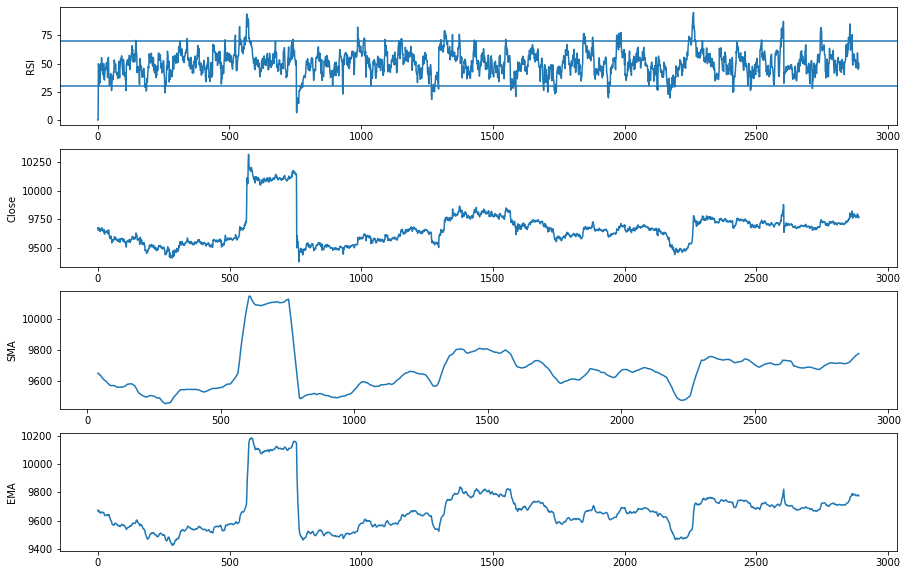

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,  figsize=(15,10))


ax = sns.lineplot(x=range(len(X)), y='RSI', data=X, ax=axs[0])
ax.axhline(70)
ax.axhline(30)

sns.lineplot(x=range(len(data)), y='Close', data=data, ax=axs[1])
sns.lineplot(x=range(len(X)), y='SMA', data=X, ax=axs[2])
sns.lineplot(x=range(len(X)), y='EMA', data=X, ax=axs[3])


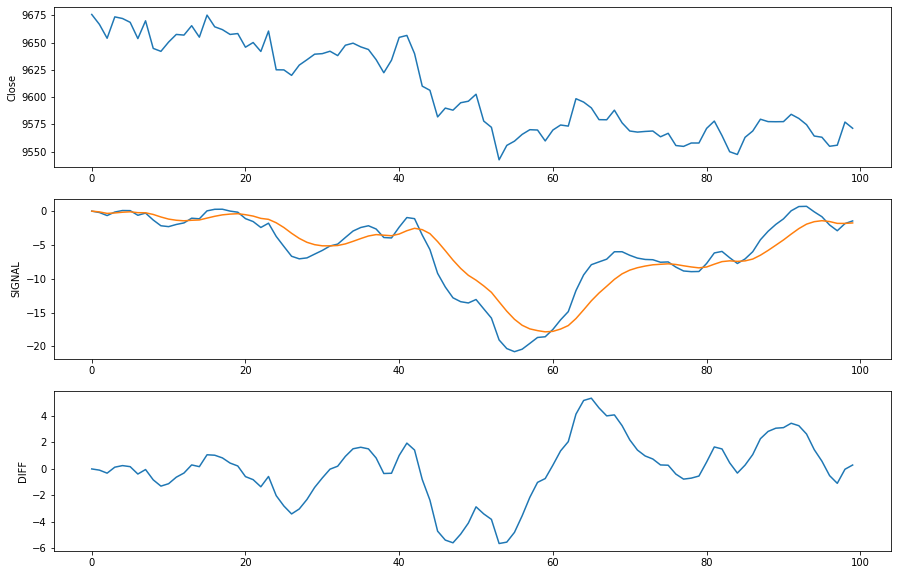

In [68]:
macd = getattr(TA, 'MACD')(data)
macd['DIFF'] = macd['MACD'] - macd['SIGNAL']
fig, axs = plt.subplots(3,  figsize=(15,10))
sns.lineplot(x=range(len(data))[:100], y='Close', data=data[:100], ax=axs[0])
sns.lineplot(x=range(len(X))[:100], y='MACD', data=macd[:100], ax=axs[1])
sns.lineplot(x=range(len(X))[:100], y='SIGNAL', data=macd[:100], ax=axs[1])
sns.lineplot(x=range(len(X))[:100], y='DIFF', data=macd[:100], ax=axs[2])

In [88]:
smad = pd.DataFrame()

periods = [10,50,100,200]

for period in periods:
    smad[period] = getattr(TA, 'SMA')(data, period=period)
    

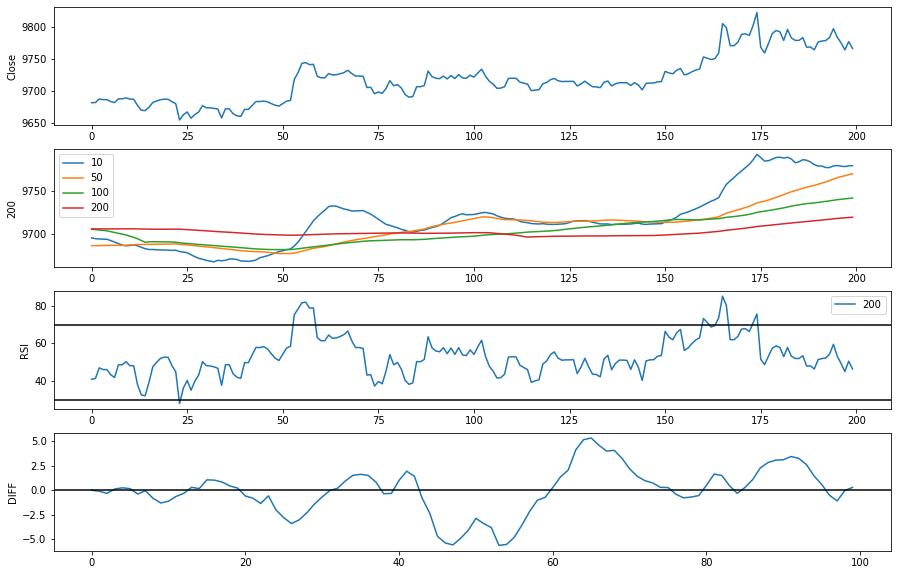

In [119]:
fig, axs = plt.subplots(4,  figsize=(15,10))
sns.lineplot(x=range(len(data[-200:])), y='Close', data=data[-200:], ax=axs[0])

for i, period in enumerate(periods):
    sns.lineplot(x=range(len(smad[-200:])), y=period, label=str(period), data=smad[-200:], ax=axs[1])

axs[1].legend()

ax = sns.lineplot(x=range(len(X[-200:])), y='RSI', label=str(period), data=X[-200:], ax=axs[2])
ax.axhline(70, c='black')
ax.axhline(30, c='black')

ax2 = sns.lineplot(x=range(len(X))[:100], y='DIFF', data=macd[:100], ax=axs[3])
ax2.axhline(0, c='black')
